1. IMPORT AND INSTALL DEPENDENCIES

In [1]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib nltk gtts

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2. KEYPOINTS USING MP HOLISTIC

In [3]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color Conversion BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # make predictions
    image.flags.writeable = True                   # Image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color Conversion RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) #draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(48,206,117), thickness=1, circle_radius=1), 
                              mp_drawing.DrawingSpec(color=(48,164,88), thickness=1, circle_radius=1)
                             )
    #draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    #draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(121,44,220), thickness=2, circle_radius=2)
                             ) 
    #draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,0), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(245,90,230), thickness=2, circle_radius=2)
                             ) 
#draw right hand connections

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model       #change to make detection confidence higher  #change to make tracking confidence higher
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        #Read feed
        ret, frame = cap.read()

        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
    
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

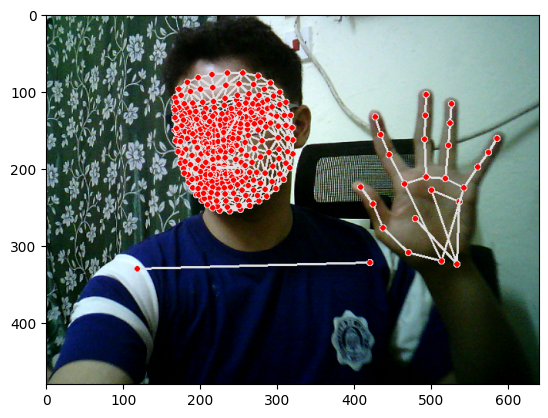

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. IMPORT AND INSTALL DEPENDENCIES

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.35982862,  0.34165773, -0.82500899, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.35982862,  0.34165773, -0.82500899, ...,  0.        ,
        0.        ,  0.        ])

4. SETUP FOLDERS FOR COLLECTION

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'i love you', 'how are you', 'nice to meet you', 'whats your name', 'goodbye', 'see you later', 'see you tomorrow', 'please', 'sorry', 'good', 'fine', 'bad', 'excuse me',
                   'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

# 30 videos worth of data
no_sequences = 30

#Videos are going to be 30 frames in length
sequence_length = 30

#Folder start
start_folder = 0

In [21]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [22]:
for action in actions:
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

5. COLLECT KEYPOINT VALUES FOR TRAINING AND TESTING

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model       #change to make detection confidence higher  #change to make tracking confidence higher
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    #New loop
    #loop through actions
    for action in actions:
        #loop through sequences aka vids
        for sequence in range(start_folder, start_folder+no_sequences):
            #loop through vid length aka sequence length
            for frame_num in range(sequence_length):
    
                #Read feed
                ret, frame = cap.read()
                
                #Make detections
                image, results = mediapipe_detection(frame, holistic)
        
                #Draw landmarks
                draw_styled_landmarks(image, results)

                #New Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #Show to screen
                    cv2.imshow('OpenCV Feed', image)

                #New Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                #Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
cap.release()
cv2.destroyAllWindows()

6. PREPROCESS DATA AND CREATE LABELS AND FEATURES

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
label_map

{'hello': 0,
 'thanks': 1,
 'i love you': 2,
 'how are you': 3,
 'nice to meet you': 4,
 'whats your name': 5,
 'goodbye': 6,
 'see you later': 7,
 'see you tomorrow': 8,
 'please': 9,
 'sorry': 10,
 'good': 11,
 'fine': 12,
 'bad': 13,
 'excuse me': 14,
 'A': 15,
 'B': 16,
 'C': 17,
 'D': 18,
 'E': 19,
 'F': 20,
 'G': 21,
 'H': 22,
 'I': 23,
 'J': 24,
 'K': 25,
 'L': 26,
 'M': 27,
 'N': 28,
 'O': 29,
 'P': 30,
 'Q': 31,
 'R': 32,
 'S': 33,
 'T': 34,
 'U': 35,
 'V': 36,
 'W': 37,
 'X': 38,
 'Y': 39,
 'Z': 40}

In [63]:
import os

# Define the parent directory where the search will start
parent_directory = 'C:\Windows\System32\MP_Data'  # Replace with the actual path

# Define the range of folder names to delete
start_folder_name = '30'
end_folder_name = '59'

# Function to delete folders recursively
def delete_folders(path):
    for root, dirs, files in os.walk(path, topdown=False):
        for folder_name in dirs:
            if start_folder_name <= folder_name <= end_folder_name:
                folder_path = os.path.join(root, folder_name)
                try:
                    # Delete the folder and its contents
                    os.rmdir(folder_path)  # This removes empty directories
                    # If you want to remove non-empty directories, you can use shutil.rmtree
                    # import shutil
                    # shutil.rmtree(folder_path)
                    print(f"Deleted folder: {folder_path}")
                except OSError as e:
                    print(f"Error deleting folder {folder_path}: {e}")

# Call the function to start the deletion process
delete_folders(parent_directory)


Deleted folder: C:\Windows\System32\MP_Data\A\30
Deleted folder: C:\Windows\System32\MP_Data\A\31
Deleted folder: C:\Windows\System32\MP_Data\A\32
Deleted folder: C:\Windows\System32\MP_Data\A\33
Deleted folder: C:\Windows\System32\MP_Data\A\34
Deleted folder: C:\Windows\System32\MP_Data\A\35
Deleted folder: C:\Windows\System32\MP_Data\A\36
Deleted folder: C:\Windows\System32\MP_Data\A\37
Deleted folder: C:\Windows\System32\MP_Data\A\38
Deleted folder: C:\Windows\System32\MP_Data\A\39
Error deleting folder C:\Windows\System32\MP_Data\A\4: [WinError 145] The directory is not empty: 'C:\\Windows\\System32\\MP_Data\\A\\4'
Deleted folder: C:\Windows\System32\MP_Data\A\40
Deleted folder: C:\Windows\System32\MP_Data\A\41
Deleted folder: C:\Windows\System32\MP_Data\A\42
Deleted folder: C:\Windows\System32\MP_Data\A\43
Deleted folder: C:\Windows\System32\MP_Data\A\44
Deleted folder: C:\Windows\System32\MP_Data\A\45
Deleted folder: C:\Windows\System32\MP_Data\A\46
Deleted folder: C:\Windows\Sys

In [61]:
import os
import shutil

# Define the path to the parent directory containing the folders to be deleted
parent_directory = 'C:/Windows/System32/MP_Data/i love you'  # Use forward slashes or escape backslashes

# Iterate through the range of folder numbers (0 to 29)
for folder_number in range(30):
    folder_name = str(folder_number)  # Convert the number to a string
    
    # Create the full path for the folder
    folder_path = os.path.join(parent_directory, folder_name)
    
    # Check if the folder exists before attempting to delete it
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        try:
            # Use shutil.rmtree() to remove the folder and its contents
            shutil.rmtree(folder_path)
            print(f"Deleted folder {folder_name}")
        except OSError as e:
            print(f"Error deleting folder {folder_name}: {e}")
    else:
        print(f"Folder {folder_name} not found or not a directory")

print("Deletion process completed.")


Deleted folder 0
Deleted folder 1
Deleted folder 2
Deleted folder 3
Deleted folder 4
Deleted folder 5
Deleted folder 6
Deleted folder 7
Deleted folder 8
Deleted folder 9
Deleted folder 10
Deleted folder 11
Deleted folder 12
Deleted folder 13
Deleted folder 14
Deleted folder 15
Deleted folder 16
Deleted folder 17
Deleted folder 18
Deleted folder 19
Deleted folder 20
Deleted folder 21
Deleted folder 22
Deleted folder 23
Deleted folder 24
Deleted folder 25
Deleted folder 26
Deleted folder 27
Deleted folder 28
Deleted folder 29
Deletion process completed.


In [62]:
import os

# Define the path to the parent directory containing the folders to be renamed
parent_directory = 'C:/Windows/System32/MP_Data/i love you'

# Get a list of subdirectories (folders) in the parent directory
folders = [folder for folder in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, folder))]

# Sort the folders to ensure they are in the correct order
folders.sort()

# Iterate through the folders and rename them to a sequential range from 0 to 29
for index, old_folder_name in enumerate(folders):
    new_folder_name = str(index)  # Rename to a sequential number (0, 1, 2, ..., 29)
    
    # Create the full paths for old and new folder names
    old_folder_path = os.path.join(parent_directory, old_folder_name)
    new_folder_path = os.path.join(parent_directory, new_folder_name)
    
    # Rename the folder
    os.rename(old_folder_path, new_folder_path)

print("Folders renamed successfully.")


Folders renamed successfully.


In [64]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [65]:
np.array(sequences).shape

(1230, 30, 1662)

In [66]:
np.array(labels).shape

(1230,)

In [67]:
X = np.array(sequences)

In [68]:
X.shape

(1230, 30, 1662)

In [69]:
y = to_categorical(labels).astype(int)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [71]:
print(X_train)

[[[ 0.45813647  0.44484949 -0.78198683 ...  0.27250558  0.58770639
   -0.05573386]
  [ 0.45226464  0.44559261 -0.65614069 ...  0.22578579  0.57128972
   -0.0310203 ]
  [ 0.43517843  0.44753727 -0.59348875 ...  0.20802458  0.58984536
   -0.02237002]
  ...
  [ 0.38236558  0.44971249 -0.64558482 ...  0.20065118  0.5899449
   -0.02265082]
  [ 0.38251907  0.45024177 -0.63804185 ...  0.19990432  0.5907073
   -0.02166858]
  [ 0.38334763  0.45039299 -0.63522202 ...  0.19949584  0.58926785
   -0.02234267]]

 [[ 0.52083236  0.52754682 -0.66864544 ...  0.07655559  0.56509572
   -0.04430657]
  [ 0.51493204  0.52557445 -0.59938514 ...  0.08402677  0.57101887
   -0.03931047]
  [ 0.51240122  0.52501577 -0.6101203  ...  0.08593248  0.57206261
   -0.0400385 ]
  ...
  [ 0.20210323  0.48952278 -0.54972863 ...  0.          0.
    0.        ]
  [ 0.1897482   0.48737398 -0.66047049 ...  0.          0.
    0.        ]
  [ 0.18153766  0.4874433  -0.64565986 ...  0.          0.
    0.        ]]

 [[ 0.54378521

In [72]:
y_train.shape

(615, 41)

7. BUILD AND TRAIN LSTM NEURAL NETWORK

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [74]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [75]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [76]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [81]:
history = model.fit(X_train, y_train, batch_size=32, epochs=300, validation_split=0)

Epoch 1/300
20/20 [==============================] - 4s 103ms/step - loss: 3.6907 - categorical_accuracy: 0.0341
Epoch 2/300
20/20 [==============================] - 2s 86ms/step - loss: 3.6907 - categorical_accuracy: 0.0341
Epoch 3/300
20/20 [==============================] - 2s 90ms/step - loss: 3.6908 - categorical_accuracy: 0.0341
Epoch 4/300
20/20 [==============================] - 2s 86ms/step - loss: 3.6907 - categorical_accuracy: 0.0341
Epoch 5/300
20/20 [==============================] - 2s 89ms/step - loss: 3.6907 - categorical_accuracy: 0.0341
Epoch 6/300
20/20 [==============================] - 2s 88ms/step - loss: 3.6908 - categorical_accuracy: 0.0341
Epoch 7/300
20/20 [==============================] - 2s 94ms/step - loss: 3.6908 - categorical_accuracy: 0.0341
Epoch 8/300
20/20 [==============================] - 2s 97ms/step - loss: 3.6907 - categorical_accuracy: 0.0341
Epoch 9/300
20/20 [==============================] - 2s 97ms/step - loss: 3.6908 - categorical_accuracy

KeyboardInterrupt: 

In [80]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
20/20 [==============================] - 7s 87ms/step - loss: 3.6821 - categorical_accuracy: 0.0309
Epoch 2/500
20/20 [==============================] - 2s 89ms/step - loss: 3.6846 - categorical_accuracy: 0.0309
Epoch 3/500
20/20 [==============================] - 2s 90ms/step - loss: 3.6825 - categorical_accuracy: 0.0309
Epoch 4/500
20/20 [==============================] - 2s 94ms/step - loss: 3.6808 - categorical_accuracy: 0.0309
Epoch 5/500
20/20 [==============================] - 2s 97ms/step - loss: 3.6799 - categorical_accuracy: 0.0309
Epoch 6/500
20/20 [==============================] - 2s 97ms/step - loss: 3.6776 - categorical_accuracy: 0.0309
Epoch 7/500
20/20 [==============================] - 2s 94ms/step - loss: 3.6766 - categorical_accuracy: 0.0325
Epoch 8/500
20/20 [==============================] - 2s 97ms/step - loss: 3.6755 - categorical_accuracy: 0.0325
Epoch 9/500
20/20 [==============================] - 2s 93ms/step - loss: 3.6748 - categorical_accuracy:

In [135]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 41)                1353      
                                                                 
Total params: 597929 (2.28 MB)
Trainable params: 59792

8. MAKE PREDICTIONS

In [137]:
res = model.predict(X_test)

27/27 [==============================] - 1s 35ms/step


In [143]:
actions[np.argmax(res[1])]

'sorry'

In [145]:
actions[np.argmax(y_test[7])]

'i love you'

9. SAVE WEIGHTS

In [147]:
model.save('action.h5')

In [85]:
del model

In [95]:
model.load_weights('action.h5')

10. EVALUATION USING CONFUSION MATRIX AND ACCURACY

In [148]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [149]:
yhat = model.predict(X_train)

27/27 [==============================] - 21s 39ms/step


In [150]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [151]:
ytrue

[40,
 22,
 39,
 5,
 3,
 6,
 32,
 36,
 9,
 32,
 22,
 33,
 27,
 10,
 36,
 4,
 40,
 1,
 18,
 9,
 1,
 13,
 15,
 25,
 39,
 8,
 27,
 5,
 24,
 13,
 27,
 14,
 12,
 12,
 16,
 25,
 8,
 7,
 7,
 10,
 13,
 14,
 20,
 33,
 12,
 20,
 17,
 10,
 5,
 20,
 40,
 16,
 39,
 8,
 25,
 2,
 2,
 10,
 12,
 35,
 1,
 13,
 23,
 4,
 6,
 27,
 11,
 6,
 6,
 33,
 15,
 25,
 7,
 22,
 0,
 14,
 7,
 8,
 2,
 37,
 14,
 11,
 38,
 14,
 8,
 40,
 2,
 14,
 9,
 40,
 26,
 15,
 5,
 37,
 12,
 5,
 6,
 18,
 10,
 37,
 36,
 8,
 8,
 5,
 31,
 7,
 37,
 11,
 6,
 18,
 16,
 3,
 13,
 0,
 3,
 22,
 15,
 3,
 40,
 18,
 11,
 10,
 6,
 9,
 23,
 12,
 0,
 6,
 35,
 34,
 15,
 33,
 19,
 12,
 14,
 1,
 17,
 17,
 7,
 1,
 10,
 30,
 24,
 12,
 18,
 32,
 9,
 35,
 35,
 32,
 4,
 7,
 6,
 15,
 1,
 33,
 1,
 11,
 23,
 21,
 15,
 39,
 5,
 6,
 9,
 31,
 3,
 8,
 11,
 19,
 36,
 32,
 1,
 6,
 17,
 13,
 18,
 27,
 40,
 32,
 4,
 29,
 18,
 11,
 39,
 39,
 19,
 11,
 0,
 7,
 15,
 36,
 11,
 23,
 30,
 13,
 0,
 0,
 33,
 30,
 33,
 10,
 37,
 12,
 31,
 12,
 29,
 18,
 34,
 27,
 26,
 25,
 16,
 3

In [152]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[814,   0],
        [ 26,   0]],

       [[808,   0],
        [ 32,   0]],

       [[811,   0],
        [ 29,   0]],

       [[813,   0],
        [ 27,   0]],

       [[817,   0],
        [ 23,   0]],

       [[809,   0],
        [ 31,   0]],

       [[808,   0],
        [ 32,   0]],

       [[810,   0],
        [ 30,   0]],

       [[810,   0],
        [ 30,   0]],

       [[810,   0],
        [ 30,   0]],

       [[  2, 811],
        [  0,  27]],

       [[810,   0],
        [ 30,   0]],

       [[811,   0],
        [ 29,   0]],

       [[815,   0],
        [ 25,   0]],

       [[807,   0],
        [ 31,   2]],

       [[821,   0],
        [ 19,   0]],

       [[817,   0],
        [ 23,   0]],

       [[826,   0],
        [ 14,   0]],

       [[822,   0],
        [ 18,   0]],

       [[826,   0],
        [ 14,   0]],

       [[827,   0],
        [ 13,   0]],

       [[819,   0],
        [ 21,   0]],

       [[827,   0],
        [ 13,   0]],

       [[823,   0],
        [ 17, 

In [153]:
accuracy_score(ytrue, yhat)

0.034523809523809526

11. TEST IN REAL TIME

In [102]:
from scipy import stats

colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), +num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 4, cv2.LINE_AA)

    return output_frame

In [141]:
# Define the prob_viz function
def prob_viz(res, actions, input_frame, colors):
    # Determine the minimum length between res and actions
    min_length = min(len(res), len(actions))

    # Sort res and actions by probability in descending order
    sorted_indices = sorted(range(min_length), key=lambda i: res[i], reverse=True)
    sorted_res = [res[i] for i in sorted_indices]
    sorted_actions = [actions[i] for i in sorted_indices]
    
    # Create an output frame with the same dimensions as the input frame
    output_frame = input_frame.copy()
    
    # Display only the top 3 results
    num_to_display = min(3, min_length)
    
    for num in range(num_to_display):
        prob = sorted_res[num]
        action = sorted_actions[num]
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 60 + (num + 1) * 40), colors[num], -1)
        cv2.putText(output_frame, f'{action}: {prob:.2f}', (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 4, cv2.LINE_AA)
    
    return output_frame


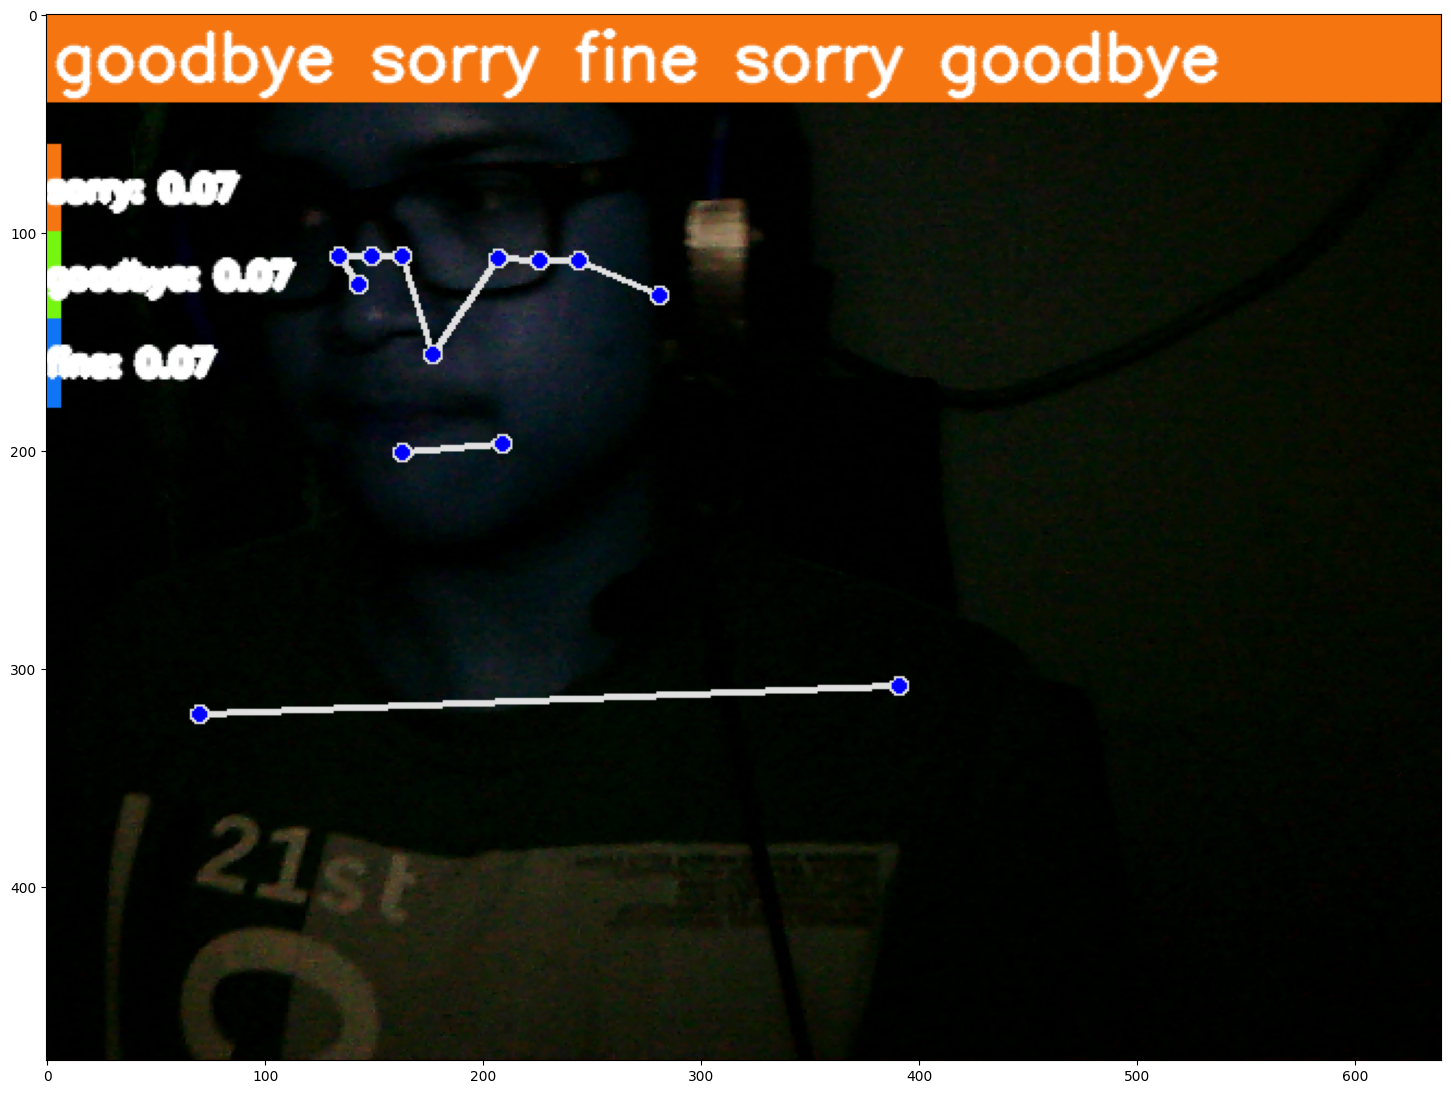

In [142]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [143]:
import cv2
import mediapipe as mp
import numpy as np

# Define the prob_viz function
def prob_viz(res, actions, input_frame, colors):
    # Determine the minimum length between res and actions
    min_length = min(len(res), len(actions))

    # Sort res and actions by probability in descending order
    sorted_indices = sorted(range(min_length), key=lambda i: res[i], reverse=True)
    sorted_res = [res[i] for i in sorted_indices]
    sorted_actions = [actions[i] for i in sorted_indices]
    
    # Create an output frame with the same dimensions as the input frame
    output_frame = input_frame.copy()
    
    # Display only the top 3 results
    num_to_display = min(3, min_length)
    
    for num in range(num_to_display):
        prob = sorted_res[num]
        action = sorted_actions[num]
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 60 + (num + 1) * 40), colors[num], -1)
        cv2.putText(output_frame, f'{action}: {prob:.2f}', (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 4, cv2.LINE_AA)
    
    return output_frame

# Define other variables and setup
sequence = []
sentence = []
predictions = []
threshold = 0.05

# Set up MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

cap = cv2.VideoCapture(0)

# Define actions and colors
actions = np.array(['hello', 'thanks', 'i love you', 'how are you', 'nice to meet you', 'whats your name', 'goodbye', 'see you later', 'see you tomorrow', 'please', 'sorry', 'good', 'fine', 'bad', 'excuse me'])
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (215, 171, 163), (215, 171, 163)]

# Capture and process frames
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    image = frame.copy()
    results = holistic.process(frame)
    
    # Draw landmarks
    if results.pose_landmarks:
        # Draw pose landmarks on the frame
        mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    
    # Prediction Logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]

    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        predictions.append(np.argmax(res))

        # Viz logic
        if np.unique(predictions[-10:])[0] == np.argmax(res):
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        # Viz probabilities using prob_viz function
        image = prob_viz(res, actions, image, colors)

    cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
    cv2.putText(image, ' '.join(sentence), (3, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Show to screen
    cv2.imshow('OpenCV Feed', image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 9s 9s/step
goodbye
1/1 [==============================] - 0s 334ms/step
goodbye
1/1 [==============================] - 0s 318ms/step
goodbye
1/1 [==============================] - 0s 232ms/step
goodbye
1/1 [==============================] - 0s 185ms/step
goodbye
1/1 [==============================] - 6s 6s/step
goodbye
1/1 [==============================] - 0s 110ms/step
goodbye
1/1 [==============================] - 0s 152ms/step
goodbye
1/1 [==============================] - 0s 132ms/step
goodbye
1/1 [==============================] - 0s 289ms/step
goodbye
1/1 [==============================] - 0s 102ms/step
fine
1/1 [==============================] - 0s 178ms/step
fine
1/1 [==============================] - 0s 95ms/step
fine
1/1 [==============================] - 0s 328ms/step
fine
1/1 [==============================] - 0s 146ms/step
fine
1/1 [==============================] - 0s 77ms/step
fine
1/1 [==============================] - 0s 226ms/st

In [137]:
    cap.release()
    cv2.destroyAllWindows()

SENTENCE FORMATION AND TEXT TO SPEECH

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gtts import gTTS
import os

# Initialize NLTK (Natural Language Toolkit)
nltk.download('punkt')
nltk.download('stopwords')

# Define the prob_viz function (as per your previous code)
def prob_viz(res, actions, input_frame, colors):
    # ... (Your prob_viz code)

# Define other variables and setup (as per your previous code)
# ...

# Initialize a variable for the recognized sentence
recognized_sentence = ""

# Capture and process frames (as per your previous code)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    image = frame.copy()
    results = holistic.process(frame)
    
    # Draw landmarks
    if results.pose_landmarks:
        # Draw pose landmarks on the frame
        mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    
    # Prediction Logic (as per your previous code)
    # ...

    # Inside your code loop where sentences are formed
    # ...
    
    # After a sentence is formed
    if len(sentence) > 0:
        # Join the words in the sentence to form a single string
        recognized_sentence = ' '.join(sentence)

        # Convert the recognized_sentence to a proper sentence (you can enhance this)
        recognized_sentence = recognized_sentence.lower()  # Convert to lowercase
        words = word_tokenize(recognized_sentence)  # Tokenize into words
        words = [word for word in words if word.isalnum()]  # Remove non-alphanumeric characters
        words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
        recognized_sentence = ' '.join(words)

        # Output the recognized_sentence as text-to-speech
        tts = gTTS(recognized_sentence)
        tts.save("recognized_sentence.mp3")

        # Play the audio (requires a compatible media player)
        os.system("mpg321 recognized_sentence.mp3")  # Replace with your platform's audio player command

    # Continue with the rest of your code
    # ...
    
    # Break gracefully (as per your previous code)
    # ...


NEURAL MACHINE TRANSLATION WITH ATTENTION

In [210]:
!pip install einops

     ---------------------------------------- 0.0/42.2 kB ? eta -:--:--
     ---------------------------------------- 42.2/42.2 kB 1.0 MB/s eta 0:00:00


In [211]:
import numpy as np

import typing
from typing import Any, Tuple

import einops
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import tensorflow as tf
import tensorflow_text as tf_text

ModuleNotFoundError: No module named 'tensorflow_text'